**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Salvador D'Carlo Abad Guarro
*   MATRÍCULA: A01017779


*   NOMBRE: Gabriel Sareñana Labra
*   MATRÍCULA: A01795507


*   NOMBRE: Alonso Pedrero Martínez
*   MATRÍCULA: A01769076

In [1]:
import pandas as pd
from scipy.stats import skew
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.binary import BinaryEncoder
from scipy.stats import yeojohnson


In [2]:
PATH = "../files/vehicles.csv"
cars_df = pd.read_csv(PATH)
display(cars_df)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `lon`.


In [4]:
columns_to_delete = ["id", "VIN", "url", "image_url",
                     "description","posting_date", "lat", "long"]
filtered_cars_df = cars_df.drop(columns = columns_to_delete)
cars_df = filtered_cars_df.copy(deep = True)
cars_df.columns

Index(['region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'county',
       'state'],
      dtype='object')

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [5]:
cars_df_columns = len(cars_df.columns)
print("Número de columnas", cars_df_columns)

cars_df_lenght = len(cars_df)
print("Número de filas", cars_df_lenght)


Número de columnas 18
Número de filas 426880


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [6]:
missing_porcentage = ((cars_df.isna().sum()/len(cars_df)).round(4))*100
display(missing_porcentage)

region            0.00
region_url        0.00
price             0.00
year              0.28
manufacturer      4.13
model             1.24
condition        40.79
cylinders        41.62
fuel              0.71
odometer          1.03
title_status      1.93
transmission      0.60
drive            30.59
size             71.77
type             21.75
paint_color      30.50
county          100.00
state             0.00
dtype: float64

In [7]:
cars_df.dropna(thresh =  len(cars_df) * 0.7, axis = 1, inplace = True)

In [8]:
missing_porcentage = (cars_df.isna().mean() * 100).round(2)
display(missing_porcentage)

region           0.00
region_url       0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
type            21.75
state            0.00
dtype: float64

In [9]:
print("Se borraron", cars_df_columns - len(cars_df.columns), "columnas")

Se borraron 6 columnas


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [10]:
cars_df.dropna(subset=cars_df.columns[cars_df.isna().mean() < 0.05], inplace = True)


In [11]:
missing_porcentage = (cars_df.isna().mean() * 100).round(2)
display(missing_porcentage)

region           0.00
region_url       0.00
price            0.00
year             0.00
manufacturer     0.00
model            0.00
fuel             0.00
odometer         0.00
title_status     0.00
transmission     0.00
type            21.21
state            0.00
dtype: float64

In [12]:
cars_df_lenght

426880

In [13]:
len(cars_df)

389604

In [14]:
deleted_percentage = ((cars_df_lenght - len(cars_df)) / cars_df_lenght)*100
deleted_percentage_rounded = round(deleted_percentage, 2)
print("porcentaje de datos borrados", deleted_percentage_rounded, "%")

porcentaje de datos borrados 8.73 %


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

La única varaible faltante es la de `type`, Esto debido a que tuvo valores faltantes menores a 30% pero mayores a 5%. Por lo tanto es la última columna con valores faltantes. COmo la variable type es categórica, se ocupa fillna mode para los valores restantes con NAN

In [15]:
cars_df.fillna(value = cars_df["type"].mode()[0], inplace = True)

In [16]:
missing_porcentage = (cars_df.isna().mean() * 100).round(2)
display(missing_porcentage)

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
dtype: float64

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

<Axes: xlabel='price', ylabel='Count'>

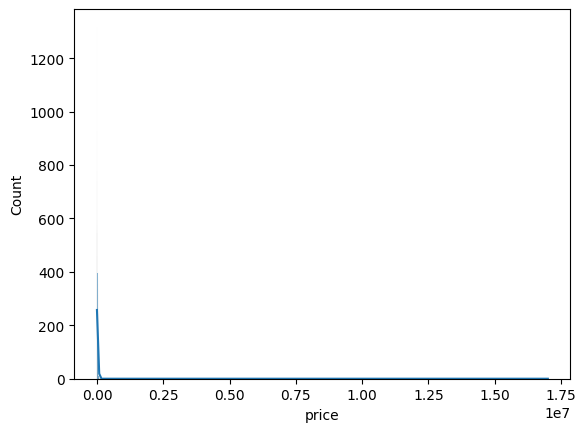

In [17]:
sample = cars_df["price"].sample(frac=0.03)
sns.histplot(x = sample, kde = True)

<Axes: >

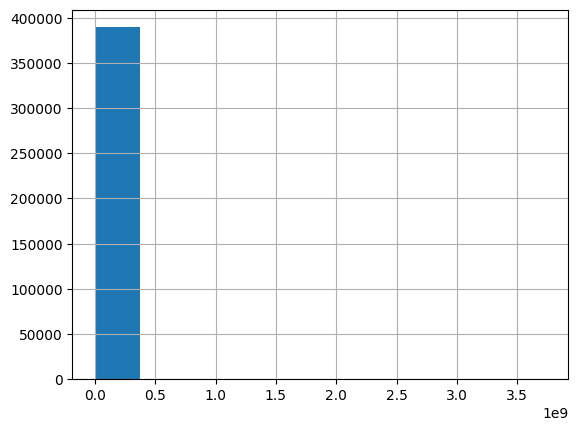

In [18]:
cars_df["price"].hist()

<Axes: xlabel='year', ylabel='Count'>

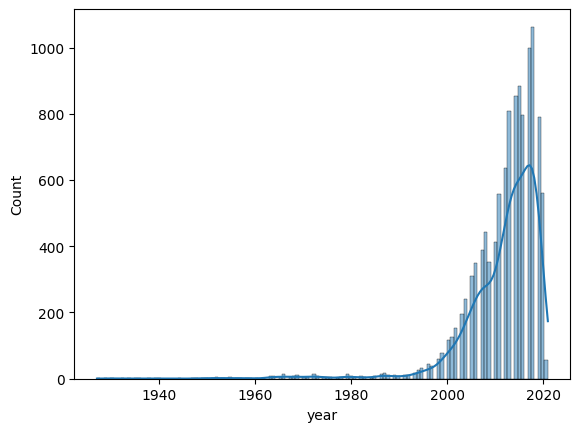

In [19]:
sample = cars_df["year"].sample(frac=0.03)
sns.histplot(x = sample, kde= True)

<Axes: >

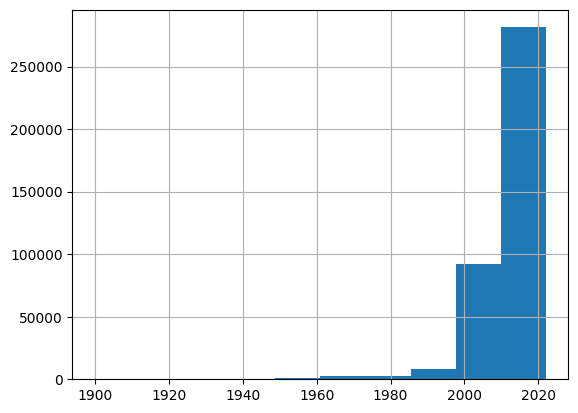

In [20]:
cars_df["year"].hist()

<Axes: xlabel='odometer', ylabel='Count'>

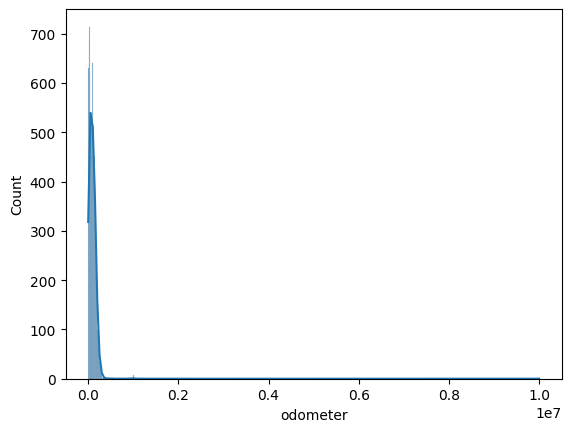

In [21]:
sample = cars_df["odometer"].sample(frac=0.03)
sns.histplot(x = sample, kde= True)

<Axes: >

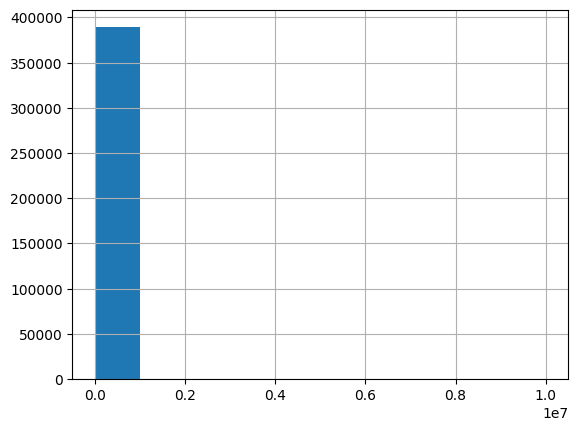

In [22]:
cars_df["odometer"].hist()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [23]:
cars_df["age"] = 2024 - cars_df["year"]
cars_df.drop(columns=["year"], inplace=True)
display(cars_df)

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,10.0
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,14.0
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,4.0
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,7.0
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,5.0
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,4.0
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,4.0
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,6.0


<Axes: xlabel='age', ylabel='Count'>

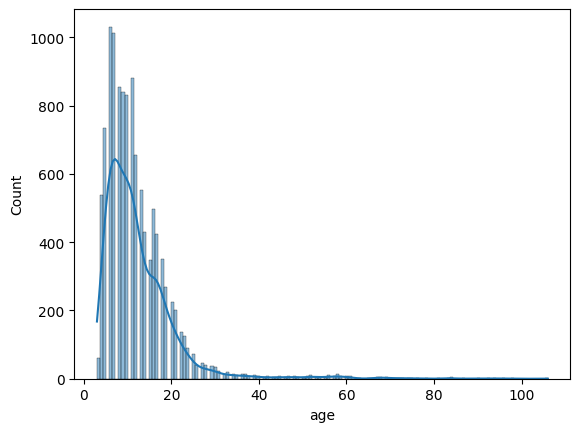

In [24]:
sample = cars_df["age"].sample(frac=0.03)
sns.histplot(x = sample, kde= True)

<Axes: >

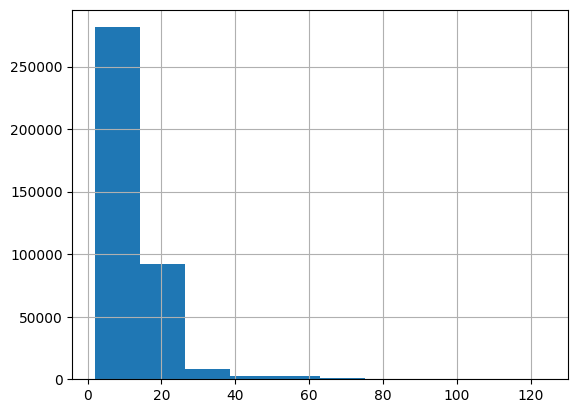

In [25]:
cars_df["age"].hist()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

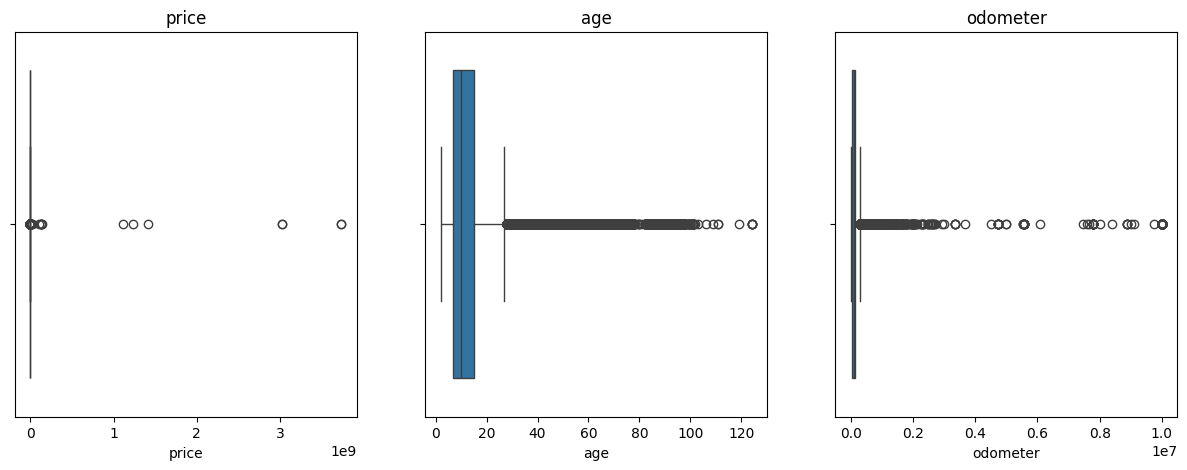

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=cars_df["price"], ax=axes[0])
sns.boxplot(x=cars_df["age"], ax=axes[1])
sns.boxplot(x=cars_df["odometer"], ax=axes[2])

axes[0].set_title("price")
axes[1].set_title("age")
axes[2].set_title("odometer")

plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

In [27]:
cars_df.describe().T.applymap(lambda x: f"{x:.2f}")

/var/folders/xj/856h4cfd3k52z_02341c_sxc0000gn/T/ipykernel_76210/3737644311.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cars_df.describe().T.applymap(lambda x: f"{x:.2f}")


,count,mean,std,min,25%,50%,75%,max
price,389604.00,63955.28,11448646.03,0.00,5995.00,13995.00,26590.00,3736928711.00
odometer,389604.00,96352.40,191418.11,0.00,38093.00,85753.00,133315.00,10000000.00
age,389604.00,12.39,8.64,2.00,7.00,10.00,15.00,124.00


Todos tienen una desviación estándar muy alta, valores máximos muy altos comaparados al tercer cuartil. En la gráfica de boxplot se puede observar que hay valores muy altos de outliers.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [28]:
class Outliers():
    @staticmethod
    def outlier_detection(df_input : pd.DataFrame, df_column : str):
        df = df_input.copy(deep = True)
        Q1 = df[df_column].quantile(0.25)
        Q3 = df[df_column].quantile(0.75)
        IQR = Q3-Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        BM = df[(df[df_column] >= lower_bound) & (df[df_column] <= upper_bound)]
        
        deleted_percentage = ((len(df) - len(BM)) / len(df))*100

        percentage_rounded = round(deleted_percentage, 2)
        print("porcentaje de outliers", percentage_rounded, "%")
        
        return BM


In [29]:
cars_df = Outliers.outlier_detection(cars_df, "price")

porcentaje de outliers 1.71 %


In [30]:
cars_df = Outliers.outlier_detection(cars_df, "odometer")

porcentaje de outliers 0.83 %


In [31]:
cars_df = Outliers.outlier_detection(cars_df, "age")

porcentaje de outliers 3.53 %


In [32]:
deleted_percentage = ((cars_df_lenght - len(cars_df)) / cars_df_lenght)*100

percentage_rounded = round(deleted_percentage, 2)
print("porcentaje de datos borrados hasta el momento", percentage_rounded, "%")

porcentaje de datos borrados hasta el momento 14.18 %


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

<Axes: xlabel='price', ylabel='Count'>

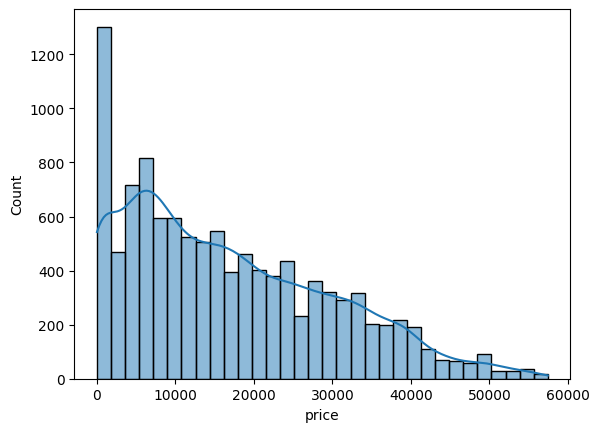

In [33]:
sample = cars_df["price"].sample(frac=0.03)
sns.histplot(x = sample, kde = True)

<Axes: >

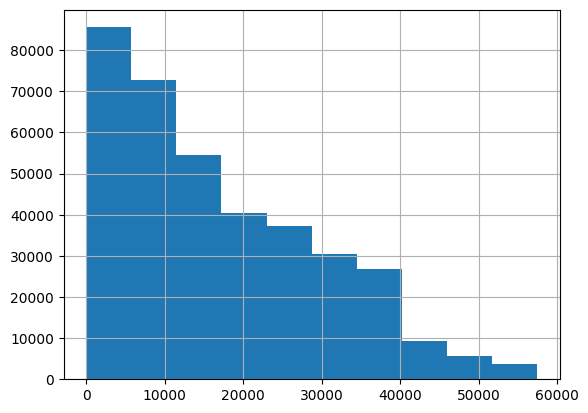

In [34]:
cars_df["price"].hist()

<Axes: xlabel='age', ylabel='Count'>

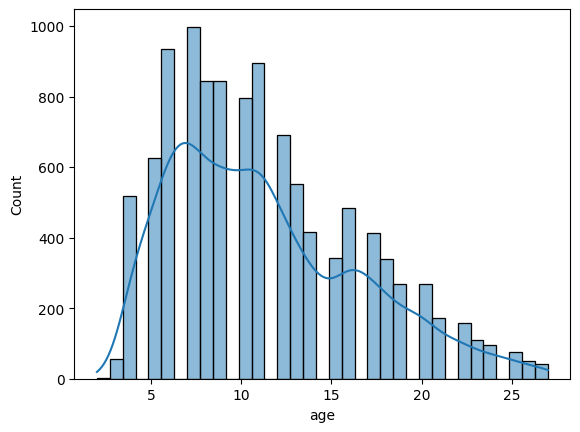

In [35]:
sample = cars_df["age"].sample(frac=0.03)
sns.histplot(x = sample, kde= True)

<Axes: >

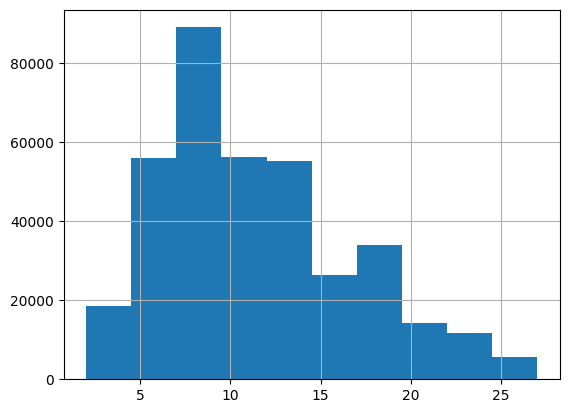

In [36]:
cars_df["age"].hist()

<Axes: xlabel='odometer', ylabel='Count'>

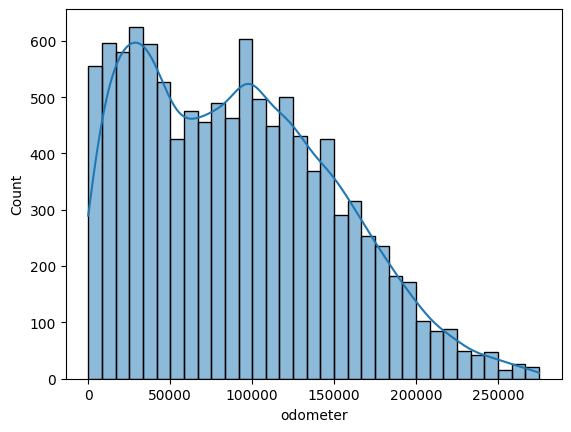

In [37]:
sample = cars_df["odometer"].sample(frac=0.03)
sns.histplot(x = sample, kde= True)

<Axes: >

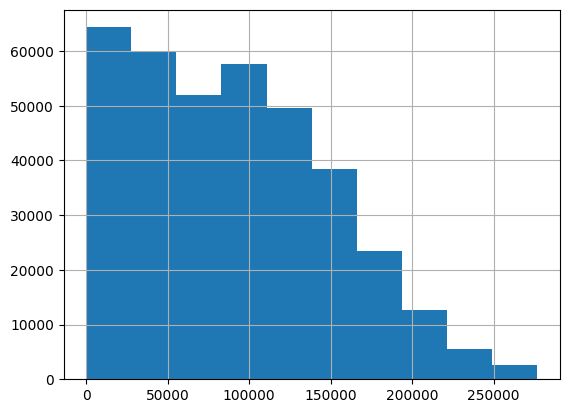

In [38]:
cars_df["odometer"].hist()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


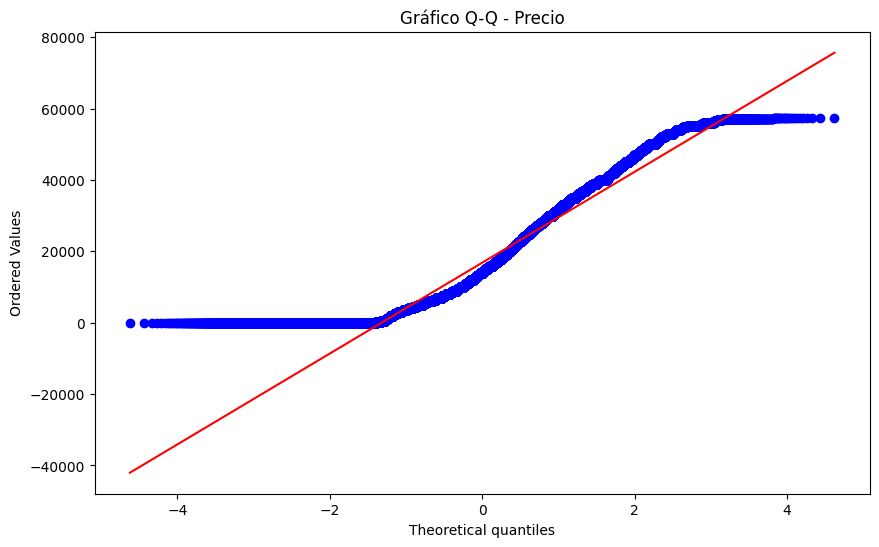

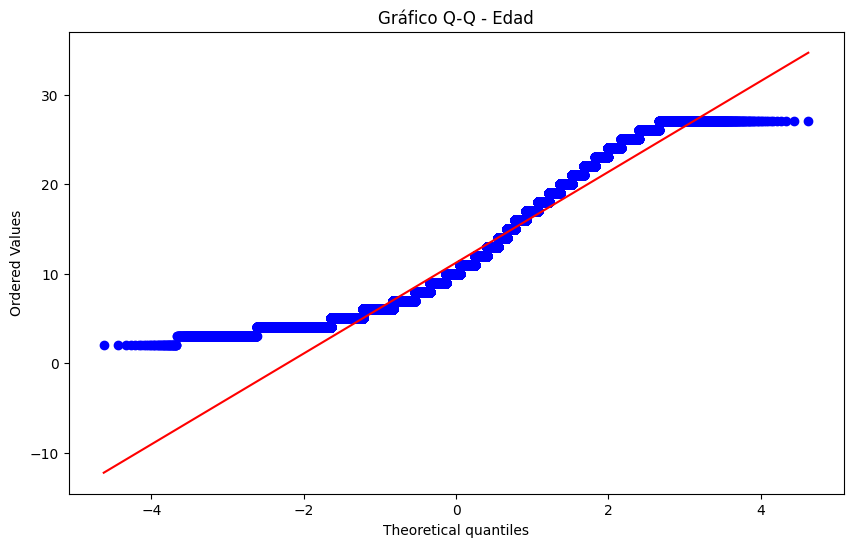

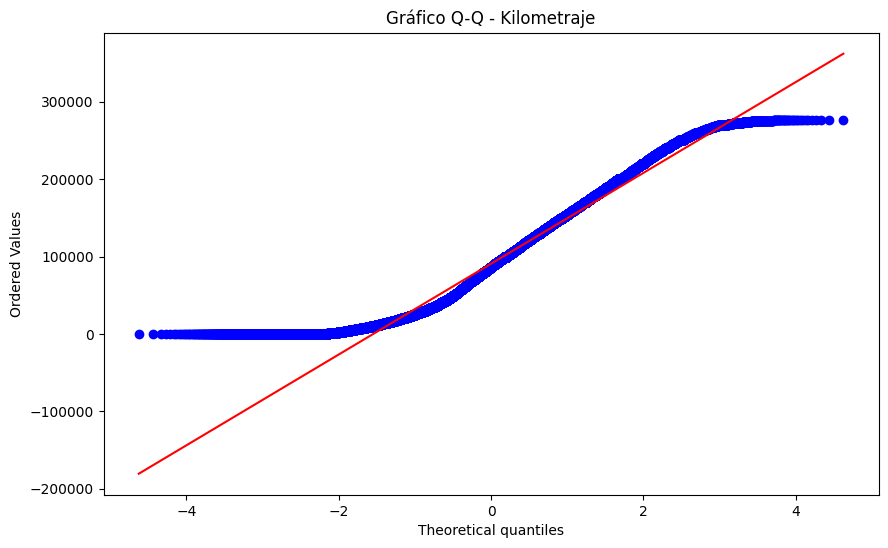

In [39]:
# Gráfico Q-Q para price
plt.figure(figsize=(10, 6))
stats.probplot(cars_df['price'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q - Precio')
plt.show()

# Gráfico Q-Q para age
plt.figure(figsize=(10, 6))
stats.probplot(cars_df['age'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q - Edad')
plt.show()

# Gráfico Q-Q para odometer
plt.figure(figsize=(10, 6))
stats.probplot(cars_df['odometer'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q - Kilometraje')
plt.show()


Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [40]:
transf_df = cars_df.copy()

num_cols = ['price', 'odometer']
for col in num_cols:
  transf_df[col], _ = yeojohnson(transf_df[col])

transf_df.head()

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,194.921892,gmc,sierra 1500 crew cab slt,gas,623.096387,clean,other,pickup,al,10.0
28,auburn,https://auburn.craigslist.org,164.317434,chevrolet,silverado 1500,gas,695.333453,clean,other,pickup,al,14.0
29,auburn,https://auburn.craigslist.org,209.191562,chevrolet,silverado 1500 crew,gas,346.242668,clean,other,pickup,al,4.0
30,auburn,https://auburn.craigslist.org,188.282601,toyota,tundra double cab sr,gas,519.531396,clean,other,pickup,al,7.0
31,auburn,https://auburn.craigslist.org,137.701247,ford,f-150 xlt,gas,948.746942,clean,automatic,truck,al,11.0


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

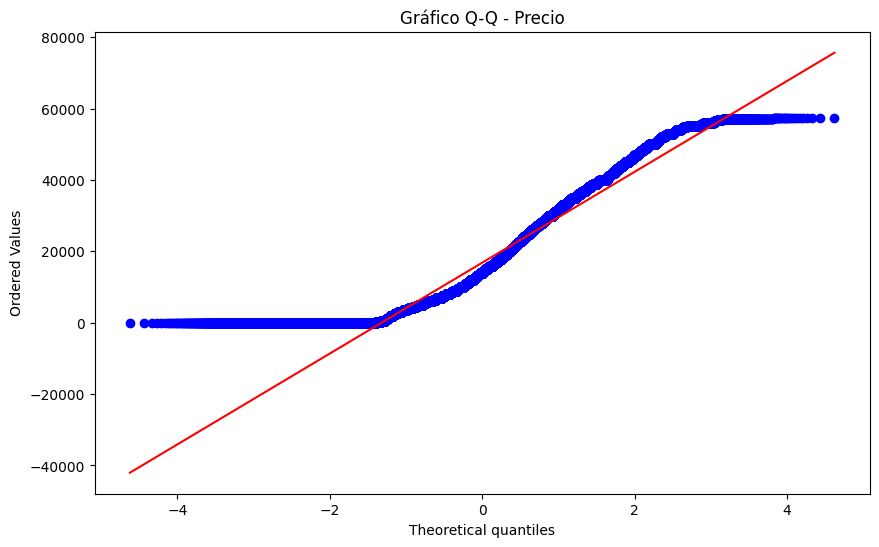

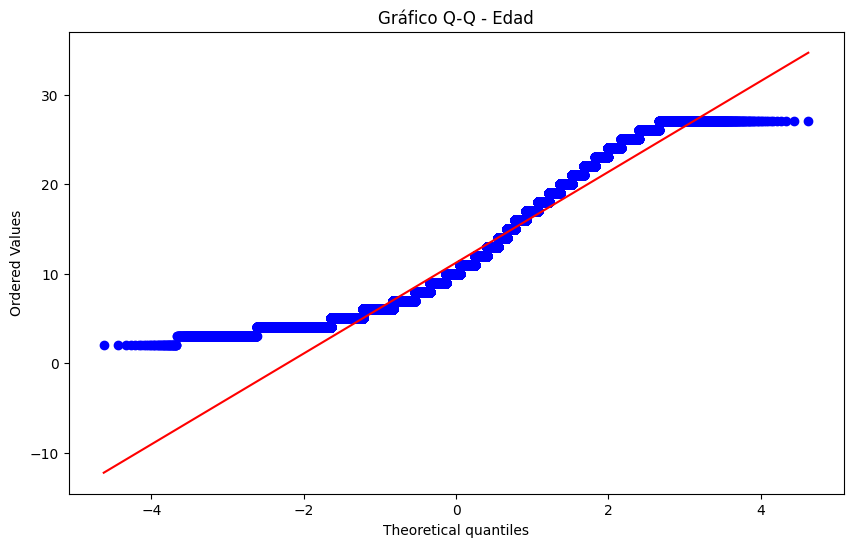

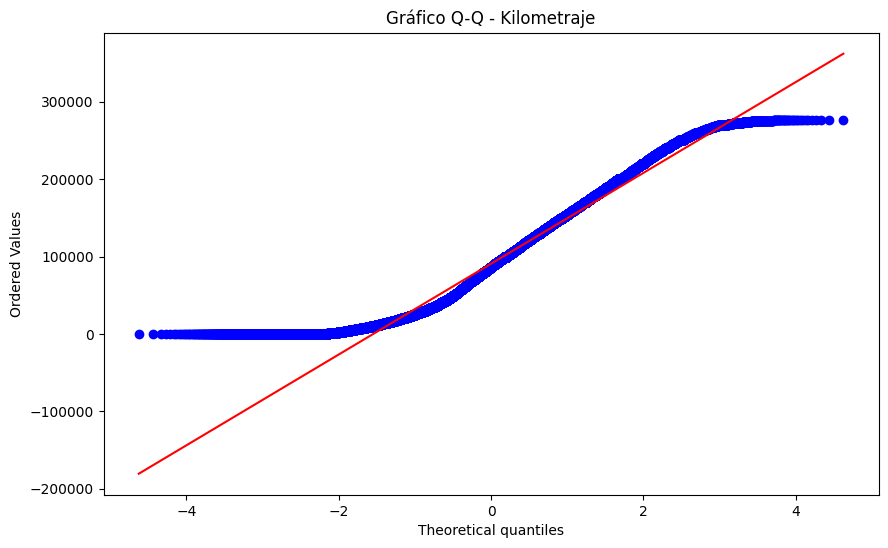

In [41]:
# Gráfico Q-Q para price
plt.figure(figsize=(10, 6))
stats.probplot(cars_df['price'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q - Precio')
plt.show()

# Gráfico Q-Q para age
plt.figure(figsize=(10, 6))
stats.probplot(cars_df['age'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q - Edad')
plt.show()

# Gráfico Q-Q para odometer
plt.figure(figsize=(10, 6))
stats.probplot(cars_df['odometer'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q - Kilometraje')
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [42]:
minmax_df = transf_df.copy()

num_cols = ['price', 'age', 'odometer']
for col in num_cols:
  minmax_df[col] = (minmax_df[col] - minmax_df[col].min()) / (minmax_df[col].max() - minmax_df[col].min())

minmax_df.head()

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,0.794063,gmc,sierra 1500 crew cab slt,gas,0.436584,clean,other,pickup,al,0.32
28,auburn,https://auburn.craigslist.org,0.669388,chevrolet,silverado 1500,gas,0.487199,clean,other,pickup,al,0.48
29,auburn,https://auburn.craigslist.org,0.852194,chevrolet,silverado 1500 crew,gas,0.242601,clean,other,pickup,al,0.08
30,auburn,https://auburn.craigslist.org,0.767017,toyota,tundra double cab sr,gas,0.364019,clean,other,pickup,al,0.20
31,auburn,https://auburn.craigslist.org,0.560961,ford,f-150 xlt,gas,0.664757,clean,automatic,truck,al,0.36


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

Text(0.5, 1.0, 'Histograma precio')

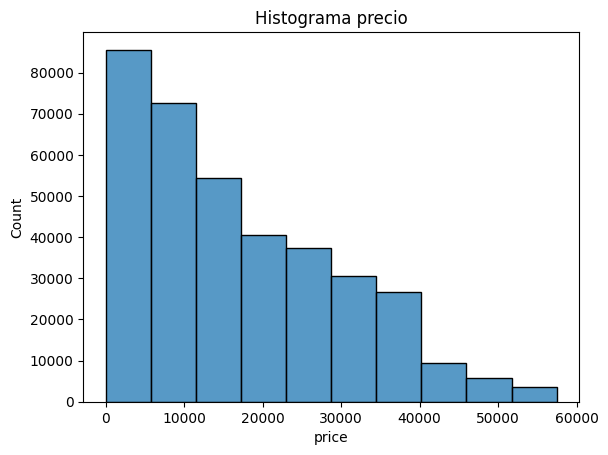

In [43]:
sns.histplot(cars_df['price'], bins=10)
plt.title('Histograma precio')

Text(0.5, 1.0, 'Histograma edad')

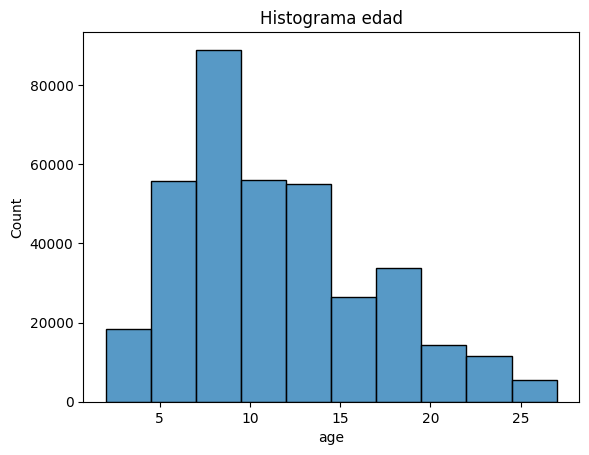

In [44]:
sns.histplot(cars_df['age'], bins=10)
plt.title('Histograma edad')

Text(0.5, 1.0, 'Histograma kilometros')

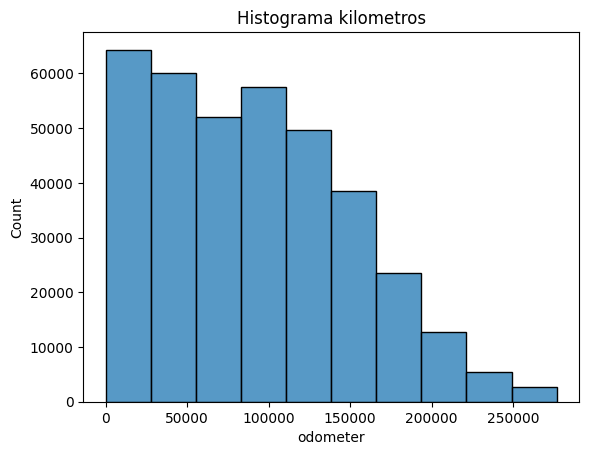

In [45]:
sns.histplot(cars_df['odometer'], bins=10)
plt.title('Histograma kilometros')

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [46]:
categoricaldf=cars_df.select_dtypes(include='object')
categoricaldf.describe().T

,count,unique,top,freq
region,366348,404,columbus,3188
region_url,366348,413,https://grandrapids.craigslist.org,2739
manufacturer,366348,40,ford,61661
model,366348,19097,f-150,7436
fuel,366348,5,gas,312095
title_status,366348,6,clean,354736
transmission,366348,3,automatic,291648
type,366348,13,sedan,154262
state,366348,51,ca,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [47]:
highly_cardinal_variables = []
few_cardinal_variables = []

for column in categoricaldf.columns:
    num_unique_values = len(categoricaldf[column].unique())
    if num_unique_values > 10:
        highly_cardinal_variables.append(column)
    else:
        few_cardinal_variables.append(column)

print('Variables de alta cardinalidad:',highly_cardinal_variables)
print('Variables de baja cardinalidad:',few_cardinal_variables)

Variables de alta cardinalidad: ['region', 'region_url', 'manufacturer', 'model', 'type', 'state']
Variables de baja cardinalidad: ['fuel', 'title_status', 'transmission']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

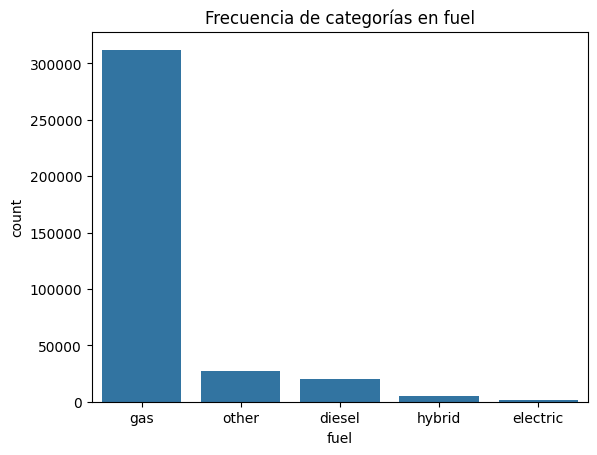

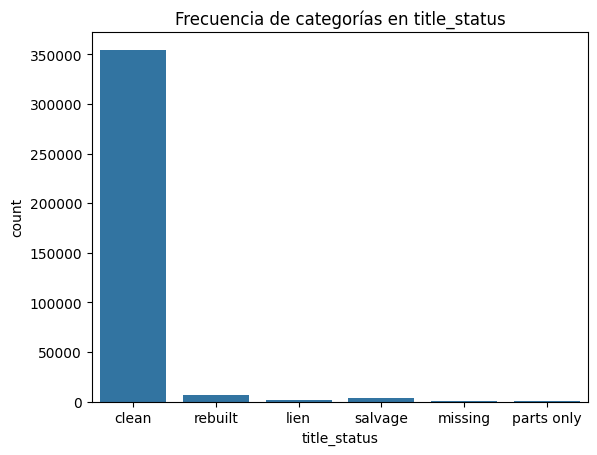

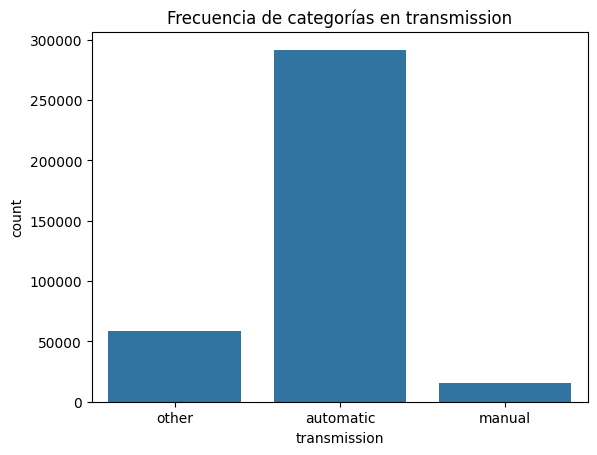

In [48]:
for col in few_cardinal_variables:
  plt.figure()
  sns.countplot(x=col, data=categoricaldf)
  plt.title(f'Frecuencia de categorías en {col}')
  plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [49]:
onehot_df = pd.get_dummies(categoricaldf[few_cardinal_variables], drop_first = True )

onehot_df.head()


,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other
27,False,True,False,False,False,False,False,False,False,False,True
28,False,True,False,False,False,False,False,False,False,False,True
29,False,True,False,False,False,False,False,False,False,False,True
30,False,True,False,False,False,False,False,False,False,False,True
31,False,True,False,False,False,False,False,False,False,False,False


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [50]:
encoder = BinaryEncoder()
encoded_data = encoder.fit_transform(categoricaldf[highly_cardinal_variables])

In [51]:
encoded_data.head()

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,type_0,type_1,type_2,type_3,state_0,state_1,state_2,state_3,state_4,state_5
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
31,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [52]:
final_df = pd.concat([minmax_df, onehot_df, encoded_data], axis=1)
final_df.reset_index(drop=True, inplace=True)
final_df.head()

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,...,type_0,type_1,type_2,type_3,state_0,state_1,state_2,state_3,state_4,state_5
0,auburn,https://auburn.craigslist.org,0.794063,gmc,sierra 1500 crew cab slt,gas,0.436584,clean,other,pickup,...,0,0,0,1,0,0,0,0,0,1
1,auburn,https://auburn.craigslist.org,0.669388,chevrolet,silverado 1500,gas,0.487199,clean,other,pickup,...,0,0,0,1,0,0,0,0,0,1
2,auburn,https://auburn.craigslist.org,0.852194,chevrolet,silverado 1500 crew,gas,0.242601,clean,other,pickup,...,0,0,0,1,0,0,0,0,0,1
3,auburn,https://auburn.craigslist.org,0.767017,toyota,tundra double cab sr,gas,0.364019,clean,other,pickup,...,0,0,0,1,0,0,0,0,0,1
4,auburn,https://auburn.craigslist.org,0.560961,ford,f-150 xlt,gas,0.664757,clean,automatic,truck,...,0,0,1,0,0,0,0,0,0,1
